In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data= pd.read_csv('all_data.csv')
print(data.head(15))

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

<center> <h2> Goals </h2> </center> 

<ul> 

 <li>Has life expectancy increased over time in the six nations? </li>
 <li>Has GDP increased over time in the six nations? </li>
 <li>Is there a correlation between GDP and life expectancy of a country? </li>
 <li>What is the average life expectancy in these nations? </li>
</ul>

In [6]:
data=data.rename({"Life expectancy at birth (years)":"LEB"},axis="columns")
data.head()

,Country,Year,LEB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The Life expectancy at birth column name was changed to leb for easier manipulation :)

<h2> Explore the Data </h2>


In [6]:
pd.unique(data["Country"])

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

<p> We have  <em> 6 different countries </em> for this dataset: 3 located in America 1 in Europe 1 in Africa and 1 in Asia

In [44]:
pd.unique(data["Year"])

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

We have 16 different years in the data set from (2000-2015) starting with the first year of the new milenium

In [47]:
length= len(data.leb)
print(length)

96


We have 96 Life expectancy and GDP values which shall be grouped by Country and Year 

<h4> Exploratory Plots </h4>

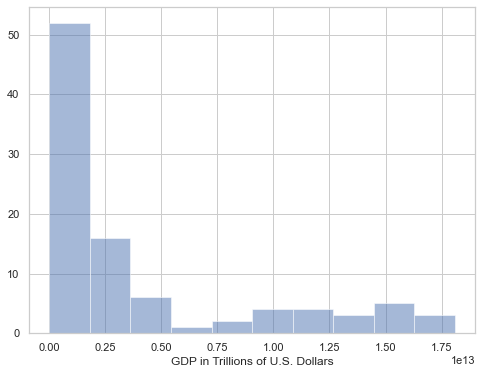

In [49]:
plt.figure(figsize=(8,6))
plt.hist(data.GDP, alpha=0.5)
plt.xlabel("GDP in Trillions of U.S. Dollars");

<AxesSubplot:xlabel='GDP', ylabel='Density'>

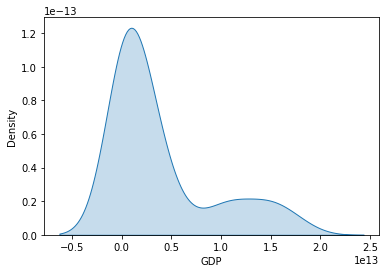

In [8]:
sns.kdeplot(data.GDP, shade=True)

To explore a bit the data we conducted a histogram for the GDP to see the skewness of the data, where in this case the data is highly right skewed, where most of the values are in the left side before the half a trillions us dollars GDP

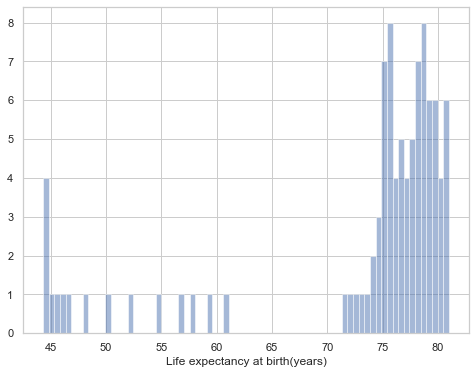

In [93]:
plt.figure(figsize=(8,6))
plt.hist(data.LEB, alpha=0.5,bins=72)
plt.xlabel("Life expectancy at birth(years)");

<AxesSubplot:xlabel='LEB', ylabel='Density'>

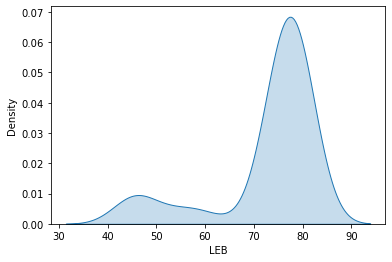

In [9]:
sns.kdeplot(data.LEB, shade=True)

We conduct the same for the Life expectancy where the data is highly left skewed where most of the values are on the right-hand side (over the 70 years barrier) 

In [58]:
DataMeans = data.drop("Year", axis=1).groupby("Country").mean().reset_index()

In [59]:
DataMeans

,Country,LEB,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Here we create the average values for GDP and LEB grouped by Country

Text(0.5, 0, 'Life expectancy at birth (Years)')

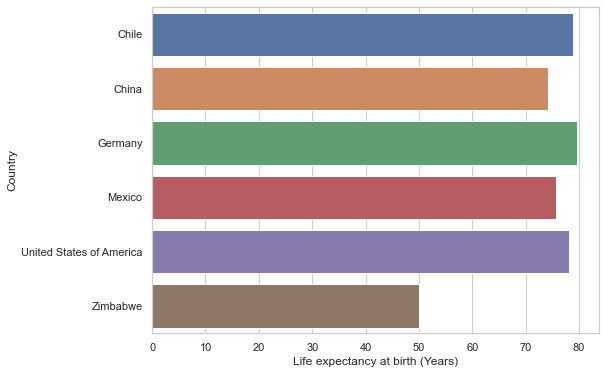

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEB",y="Country",data=DataMeans)
plt.xlabel("Life expectancy at birth (Years)")

<strong>W</strong>e can see how the Life expectancy at birth is above the 70's in all the dataset countries expect for Zimbawe. 

Text(0.5, 0, 'GDP in Trillions of U.S Dollars')

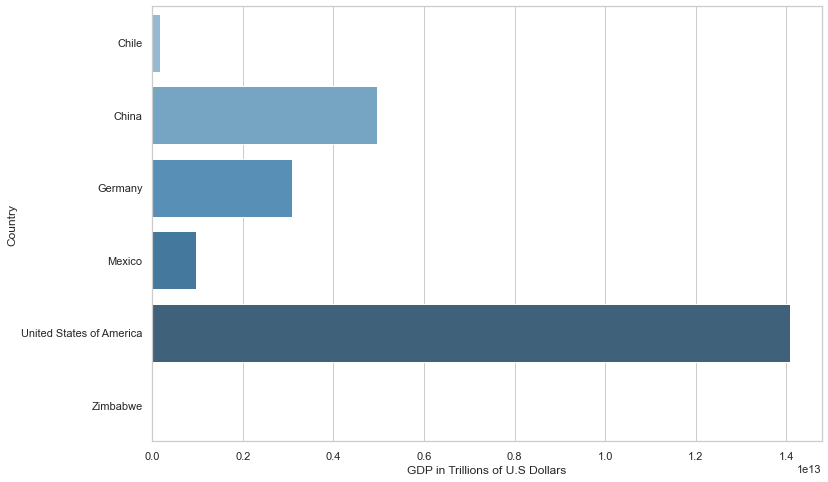

In [69]:
plt.figure(figsize=(12, 8))
sns.barplot(x="GDP",y="Country", data=DataMeans,palette="Blues_d")
plt.xlabel("GDP in Trillions of U.S Dollars")

We can see how the US has a much higher GDP compared with the rest of the countries. In the barplot Zimbabwe is not visible because of its low value and Chile is barely seen.

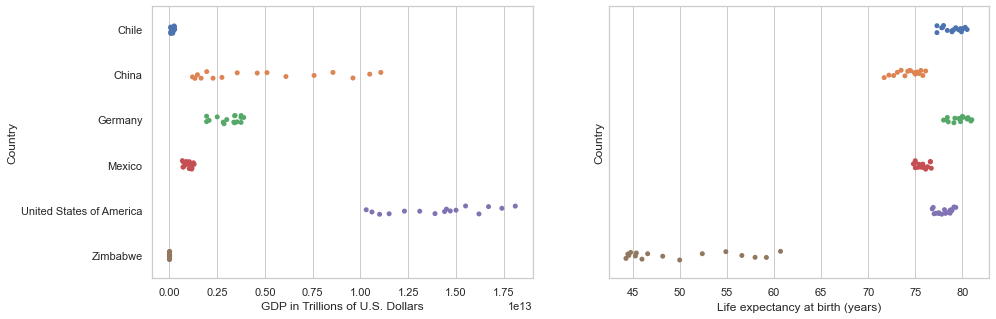

In [76]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.stripplot(ax=axes[0], x=data.GDP, y=data.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.stripplot(ax=axes[1], x=data.LEB, y=data.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

In this plot we can see a preview of how the GDP of China and of the US has grown the most over the period of 15 years, while Zimbawes GDP over the years didnt present any significant increase. 

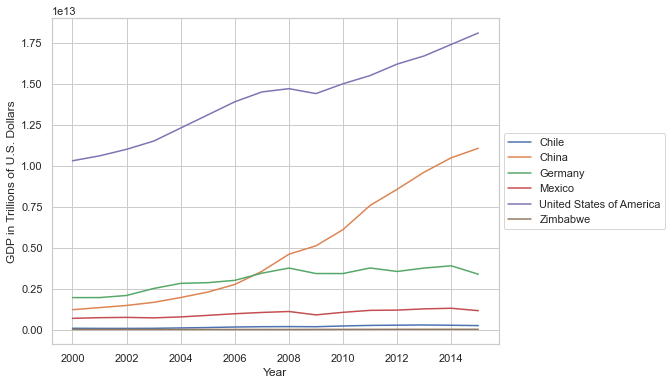

In [21]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data.Year, y=data.GDP, hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");


As we had preview in the previous graphic the U.S and China were the 2 countries with the biggest GDP growth. In the case of Germany we saw some growth in the first 8 years and then some up and downs. The us also presents a contraction in 2008 (probably due to the financial crisis) and then some growth, while China doesn't seem to be affected by the 2008 crisis and presents a continous growth.

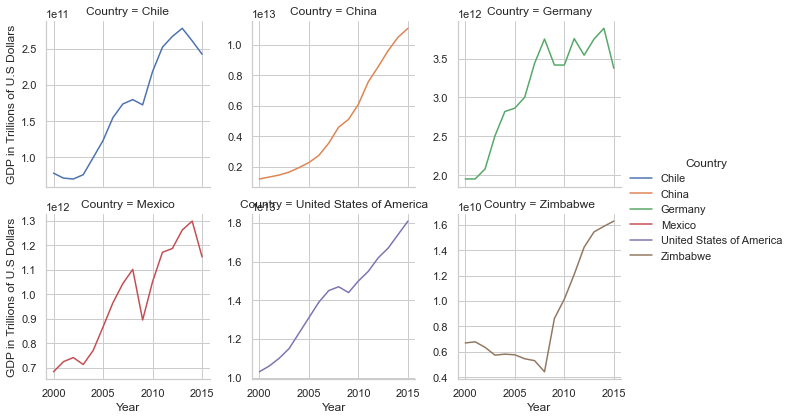

In [77]:
graphGDP = sns.FacetGrid(data, col="Country", col_wrap=3,hue="Country", sharey= False)
graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP in Trillions of U.S Dollars"))
graphGDP


As mentioned before China presents continous growth, while the US was affected by the 2008 crisis, in which also Mexico sees a decline in its GDP, probably because the two economies have strong economics ties, interesting also is the fact that Zimbawbe the first decade of the 2000 doesn't present any growth but in the last part of the decade starts with a big growing phenomenon.

<h4> Life Expectancy </h4>

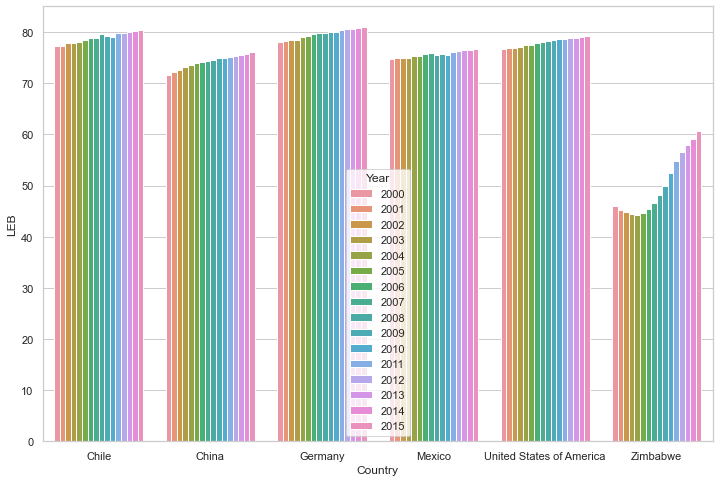

In [79]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Country", y="LEB", data=data, ci=68,hue="Year")

To answer the question if the Life expectancy has increased over the years, we plot a barplot per country and Life expectancy over the years. We can see here that almost every country presented some increase in the life expectancy over the years, however Zimbabwe in the last years presented a big increase probably linked with the increase in the GDP

Text(0, 0.5, 'Life expectancy at birth (Years)')

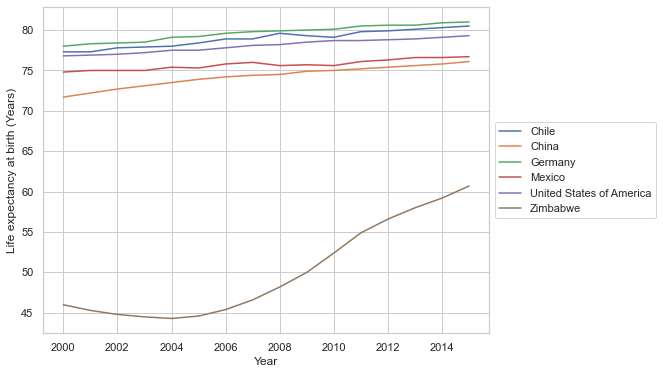

In [80]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data.Year,y=data.LEB, hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (Years)")

Here we can see better how the life expectancy grew over the decade, Germany and Chile overpased the 80's barrier and China reach the 75 years by 2014. In the case of Zimbabwe they had an amazing increase from 45 years at the begining of the milenium to 60 years by the end of 2015.

<center> <h4> GDP Life-Expectancy Relationship </h4> </center>


<AxesSubplot:xlabel='LEB', ylabel='GDP'>

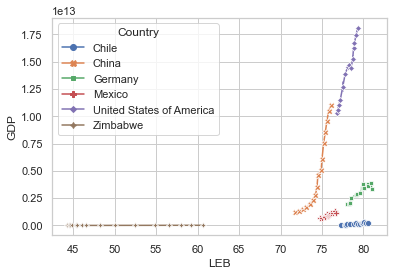

In [87]:
sns.lineplot(x=data.LEB,y=data.GDP, hue=data.Country, style=data.Country,markers=True, dashes=False,err_style="bars", ci=68)

In this plot we can see again how the life expectancy in Zimbabwe grew the most but the GDP  stayed flat , while the other countries seems to exhibit a more notorious  rise in life expectancy as GDP goes up 

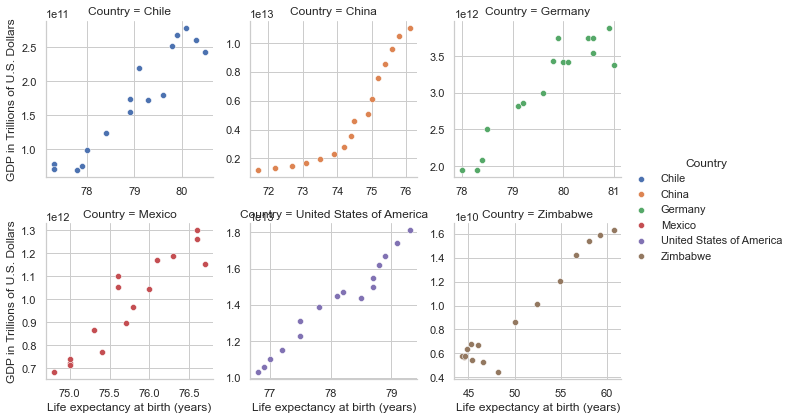

In [90]:
graph = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEB", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

In this graph we can see the relationship by country between the GDP and the Life Epectancy and see the pattern that each country is presenting. In the case of China we can see how they have more an exponential relation and the growth of Zimbabwe after reaching 0.6 Trillion.

<center> <h2> Conclusions </h2> </center> 

In this project we could see how the life expectancy is affected by GDP growth. In general in the world the life expectancy presents an growing trend, but we can see how some countries seem to present a much bigger growth and catching up with the life expectancy of the rest of the countries. We can confirm indeed that there is a correlation between GDP and life expectancy of a country, however it remains unknown if this still holds true for every GDP value or if in we could see and stagnation in the future. 